In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
df = pd.read_csv(r'D:\Projects\GDG\DataSet\dataset.csv')

In [4]:
df.head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"


In [7]:
df.drop(['id', 'avg_rating', 'url', 'created', 'num_published_lectures', 
'discount_price__currency', 'discount_price__amount', 
'published_time','is_paid', 'discount_price__price_string','price_detail__currency','price_detail__price_string' , 
'avg_rating_recent'], inplace=True, axis=1)

In [8]:
df.head()

,title,num_subscribers,rating,num_reviews,is_wishlisted,num_published_practice_tests,price_detail__amount
0,The Complete SQL Bootcamp 2020: Go from Zero t...,295509,4.67874,78006,False,0,8640.0
1,Tableau 2020 A-Z: Hands-On Tableau Training fo...,209070,4.60015,54581,False,0,8640.0
2,PMP Exam Prep Seminar - PMBOK Guide 6,155282,4.59326,52653,False,2,8640.0
3,The Complete Financial Analyst Course 2020,245860,4.53772,46447,False,0,8640.0
4,An Entire MBA in 1 Course:Award Winning Busine...,374836,4.47173,41630,False,0,8640.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         13608 non-null  object 
 1   num_subscribers               13608 non-null  int64  
 2   rating                        13608 non-null  float64
 3   num_reviews                   13608 non-null  int64  
 4   is_wishlisted                 13608 non-null  bool   
 5   num_published_practice_tests  13608 non-null  int64  
 6   price_detail__amount          13111 non-null  float64
dtypes: bool(1), float64(2), int64(3), object(1)
memory usage: 651.3+ KB


In [10]:
df.dropna(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13111 entries, 0 to 13392
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         13111 non-null  object 
 1   num_subscribers               13111 non-null  int64  
 2   rating                        13111 non-null  float64
 3   num_reviews                   13111 non-null  int64  
 4   is_wishlisted                 13111 non-null  bool   
 5   num_published_practice_tests  13111 non-null  int64  
 6   price_detail__amount          13111 non-null  float64
dtypes: bool(1), float64(2), int64(3), object(1)
memory usage: 729.8+ KB


In [14]:
rating = df['rating']
df.drop(columns=['rating'], axis=1, inplace=True)
df['rating'] = rating


In [15]:
df.head()

,title,num_subscribers,num_reviews,is_wishlisted,num_published_practice_tests,price_detail__amount,rating
0,the complete sql bootcamp 2020: go from zero t...,295509,78006,False,0,8640.0,4.67874
1,tableau 2020 a-z: hands-on tableau training fo...,209070,54581,False,0,8640.0,4.60015
2,pmp exam prep seminar - pmbok guide 6,155282,52653,False,2,8640.0,4.59326
3,the complete financial analyst course 2020,245860,46447,False,0,8640.0,4.53772
4,an entire mba in 1 course:award winning busine...,374836,41630,False,0,8640.0,4.47173


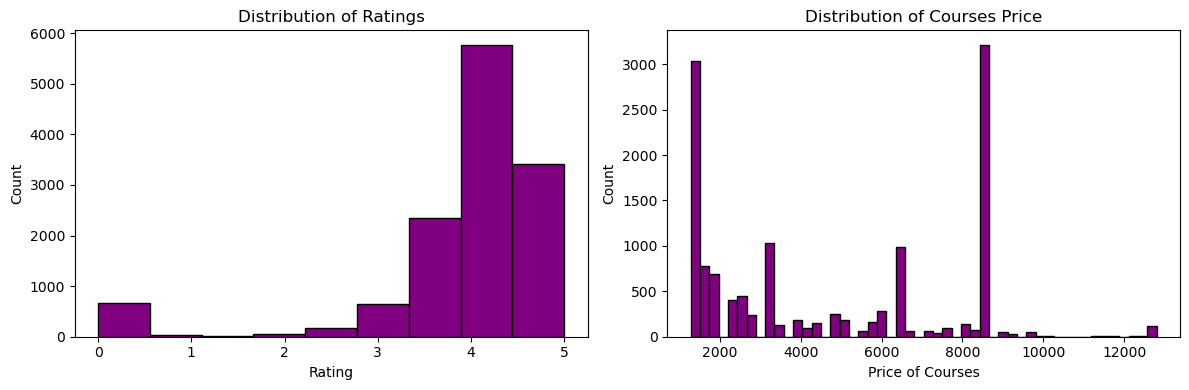

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# histogram for ratings 
axes[0].hist(df['rating'], bins=9, edgecolor='black', color='purple')
axes[0].set_title('Distribution of Ratings')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Count')
# histogram for course prices
axes[1].hist(df['price_detail__amount'], bins=50, edgecolor='black', 
color='purple')
axes[1].set_title('Distribution of Courses Price')
axes[1].set_xlabel('Price of Courses')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le_title = LabelEncoder()
le_wishlist = LabelEncoder()
df['title'] = le_title.fit_transform(df['title']) 
df['is_wishlisted'] =le_wishlist.fit_transform(df['is_wishlisted'])

In [39]:
def outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outlier_indices = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))].index
    return outlier_indices

outlier_indices = outliers(df, 'num_subscribers')
# Convert to DataFrame
outlier_indices_df = pd.DataFrame(outlier_indices, columns=['Outlier_Index'])
outlier_indices_df


,Outlier_Index
0,0
1,1
2,2
3,3
4,4
...,...
1555,11857
1556,11877
1557,11889
1558,12039


In [40]:
scaler = StandardScaler()
X = df.drop('rating', axis=1) # [1:100] --> [-1:1]
y = df['rating'] 
numerical_cols = ['num_subscribers', 'num_reviews', 'price_detail__amount']
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [46]:
train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)
from sklearn.metrics import mean_squared_error
print('MSE for training data:', mean_squared_error(y_train, train_pred)) 
print('MSE for testing data:', mean_squared_error(y_test, test_pred))


MSE for training data: 0.03963297812692526
MSE for testing data: 0.26106832362000937


In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = rf.predict(X_test)
# Evaluate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.26106832362000937
Mean Absolute Error: 0.3683793210064812
R-squared: 0.7516604194643972


In [48]:
import joblib
joblib.dump(le_title, "le_title.pkl")
joblib.dump(le_wishlist, "le_wishlist.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(rf, "rf_model.pkl")


['rf_model.pkl']

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13111 entries, 0 to 13392
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         13111 non-null  int32  
 1   num_subscribers               13111 non-null  int64  
 2   num_reviews                   13111 non-null  int64  
 3   is_wishlisted                 13111 non-null  int64  
 4   num_published_practice_tests  13111 non-null  int64  
 5   price_detail__amount          13111 non-null  float64
 6   rating                        13111 non-null  float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 768.2 KB


In [50]:
df.head()

,title,num_subscribers,num_reviews,is_wishlisted,num_published_practice_tests,price_detail__amount,rating
0,11655,295509,78006,0,0,8640.0,4.67874
1,11167,209070,54581,0,0,8640.0,4.60015
2,9133,155282,52653,0,2,8640.0,4.59326
3,11565,245860,46447,0,0,8640.0,4.53772
4,885,374836,41630,0,0,8640.0,4.47173


In [53]:
X.head()

,title,num_subscribers,num_reviews,is_wishlisted,num_published_practice_tests,price_detail__amount
0,11655,31.895785,48.805002,0,0,1.284345
1,11167,22.478888,34.103625,0,0,1.284345
2,9133,16.619078,32.893625,0,2,1.284345
3,11565,26.486889,28.998780,0,0,1.284345
4,885,40.537883,25.975662,0,0,1.284345


In [54]:
y.head()

0    4.67874
1    4.60015
2    4.59326
3    4.53772
4    4.47173
Name: rating, dtype: float64